<div class="alert alert-block alert-success">
<h1><b>PROJET 8 - </b>Participez à la conception d'une voiture autonome</h1>
<h2>Notebook Scripts</h2></div>

<img src="img_notebook/future_vision_transport.png" width="250" height="250">

## Table of Contents<hr>
[INTRODUCTION & PRESENTATION](#section_0)<br>
[A - IMPORTATIONS](#section_0A)<br>
[B - DATA COLLECTION & DESCRIPTION - EDA](#section_0B)<br>
[C - PERFORMANCE METRICS](#section_0C)<br>
&emsp;[1 - Intersection over Union (IoU)](#section_0C1)<br>
&emsp;[2 - Dice Coefficient](#section_0C2)<br>
&emsp;[3 - Performance metrics calculation function](#section_0C3)<br>
&emsp;[4 - Loss function](#section_0C4)<br><hr>
[PART 1 - DATA PREPARATION](#section_1)<br>
[A - DATA AUGMENTATION](#section_1A)<br>
&emsp;[1 - Some imgaug techniques](#section_1A1)<br>
&emsp;[2 - imgaug augmentation pipeline](#section_1A2)<br>
&emsp;[3 - Images and masks augmentation](#section_1A3)<br>
[B - DATA GENERATOR](#section_1B)<br>
[C - FINAL DATASETS FOR MODELLING](#section_1C)<br><hr>
[PART 2 - CONVOLUTIONAL NEURAL NETWORKS MODELS](#section_2)<br>
&emsp;[1 - Presentation](#section_21)<br>
&emsp;[2 - Utils functions to build the U-NET models](#section_22)<br>
&emsp;[3 - Utils functions to visualize the training process](#section_23)<br>
[A - U-NET MINI (unet_mini) - BASE MODEL](#section_2A)<br>
&emsp;[1 - Training the model](#section_2A1)<br>
&emsp;[2 - Making mask predictions](#section_2A2)<br>
[B - U-NET (unet)](#section_2B)<br>
&emsp;[1 - Building the model](#section_2B1)<br>
&emsp;[2 - Training the model](#section_2B2)<br>
&emsp;[3 - Making mask predictions](#section_2B3)<br>
[C - VGG-16 U-NET (vgg_unet)](#section_2C)<br>
&emsp;[1 - Training the model](#section_2C1)<br>
&emsp;[2 - Making mask predictions](#section_2C2)<br>
[D -  VGG-16 FCN32 (fcn_32_vgg)](#section_2D)<br>
&emsp;[1 - Training the model](#section_2D1)<br>
&emsp;[2 - Making mask predictions](#section_2D2)<br>
[E -  VGG-16 Segnet (vgg_segnet)](#section_2E)<br>
&emsp;[1 - Training the model](#section_2E1)<br>
&emsp;[2 - Making mask predictions](#section_2F2)<br>
[F - Resnet50 U-NET (resnet50_unet)](#section_2F)<br>
&emsp;[1 - Training the model](#section_2F1)<br>
&emsp;[2 - Making mask predictions](#section_2F2)<br>
[G - PSPNet101 Cityscapes (pspnet_101_cityscapes)](#section_2G)<br>
&emsp;[1 - Training the model](#section_2G1)<br>
&emsp;[2 - Making mask predictions](#section_2G2)<br><hr>
[PART 3 - PART 3 - MODELS PERFORMANCE AND POSSIBLE IMPROVEMENT](#section_3)<br>
[A - MODELS PERFORMANCE EVALUATION](#section_3A)<br>
[B - WAYS TO IMPROVE THE RESULT](#section_3B)<br>
&emsp;[1 - Hyperparameter tuning](#section_3B1)<br>
&emsp;[2 - Testing other algorithmes](#section_3B2)<br><hr>
[CONCLUSION](#section_00)<br>

<h2><div class="alert alert-block alert-success" id="section_0">
INTRODUCTION & PRESENTATION</div></h2>

### Our mission

<b>Future Vision Transport</b> is a company that designs on-board computer vision systems for <b>autonomous vehicles</b>.

In the embedded computer vision system, we need to tackle the <b>image segmentation</b> part, which is fed by the image processing block and which feeds the decision system.

### Origin of the datasets

For this <b>semantic segmentation computer vision</b> challenge, we will use the <b>Cityscapes dataset</b> which focuses on semantic understanding of urban street scenes. This present a new large-scale dataset that contains a diverse set of stereo video sequences recorded in street scenes from 50 different cities, with high quality pixel-level annotations of <b>5 000 frames</b> in addition to a larger set of 20 000 weakly annotated frames.

We will use the 5 000 frames and the grouped classes into <b>8 main categories</b>, as follows.

#### • Class Definitions

|Group|Classes|
|---|---|
|<b>flat</b>|road · sidewalk · parking+ · rail track+|
|<b>human</b>|person* · rider*|
|<b>vehicle</b>|car* · truck* · bus* · on rails* · motorcycle* · bicycle* · caravan*+ · trailer*+|
|<b>construction</b>|building · wall · fence · guard rail+ · bridge+ · tunnel+|
|<b>object</b>|pole · pole group+ · traffic sign · traffic light|
|<b>nature</b>|vegetation · terrain|
|<b>sky</b>|sky|
|<b>void</b>|ground+ · dynamic+ · static+|

  \* *Single instance annotations are available. However, if the boundary between such instances cannot be clearly seen, the whole crowd/group is labeled together and annotated as group, e.g. car group.*
  <br>\+ *This label is not included in any evaluation and treated as void (or in the case of license plate as the vehicle mounted on).*

### What is semantic segmentation?

There are <b>three levels in the image analysis: Classification, Object detection and Segmentation</b>.<br><br>
<b>In semantic segmentation, each pixel is classified according to the class of the object it belongs to</b>. Here, we are talking about human, vehicule, constructon, sky, etc. Different objects of the same class are not distinguished (it's not instance segmentation).<br><br>
Image segmentation has many applications in medical imaging, <b>self-driving cars</b> (our case) and satellite imaging, just to name a few.<br>
Again, semantic segmentation is the task of classifying each pixel in an image from a predefined set of classes, and it's used by autonomous vehicles to understand their surroundings.<br>

### What sort of Machine Learning models are we going to use ?

<b>Deep learning</b> has worked comprehensively better than the previous existing techniques and has become a norm now when dealing with Semantic Segmentation.<br><br>
Actual contribution to the field has only been achieved very recently, particularly following a revolutionary paper on <b>fully convolutional networks (FCN)</b>. It could be said that most state-of-the-art studies are in fact extensions of that same study.<br>
Thus, we will train various deep learning semantic segmentation models, mainly around <b>U-NET</b> with <b>TensorFlow and Keras</b>.

<h3><div class="alert alert-block alert-info" id="section_0A">
A - IMPORTATIONS</div></h3>

In [1]:
%matplotlib inline

# Importation of Python modules and methods.
import itertools
import os
import random
import warnings
from glob import glob
from pprint import pprint
from shutil import copyfile

# Importation of Machine Learning libraries.
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# import pickle5 as pickle  TODO
# from IPython.display import HTML, Image  TODO
from tqdm import tqdm
from keras_segmentation.pretrained import pspnet_101_cityscapes
from keras_segmentation.models.fcn import fcn_32_vgg
from keras_segmentation.models.pspnet import vgg_pspnet
from keras_segmentation.models.segnet import vgg_segnet
from keras_segmentation.models.unet import (
    unet, 
    vgg_unet, 
    unet_mini, 
    resnet50_unet
)

# Importation of TensorFlow/Keras functions or classes.
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (
    Activation, 
    BatchNormalization, 
    concatenate, 
    Conv2D,
    Conv2DTranspose, 
    Dropout, 
    MaxPooling2D, 
    Rescaling 
)
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model, Sequence, to_categorical

# Importation of imgaug (image augmentation library).
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

<h3><div class="alert alert-block alert-info" id="section_0B">
B - DATA COLLECTION & DESCRIPTION - EDA</div></h3>

The datasets we have, from Cityscapes, contain only <b>PNG images</b> with <b>size 1024 x 2048</b>.<br>
For <b>masks</b>, we are going to use the <b>gtFine_labelIds</b> ones.<br>
In total, we have <b>5 000 images</b> from different cities, and the same amount of respective masks.<br>
The directories and files are organized as follows:

#### Directory structure

```
datasets
│
└───images
│   │
│   └───test
│       └───berlin
│       |   └───berlin_000000_000019_leftImg8bit.png
│       |   └───berlin_000001_000019_leftImg8bit.png
│       |   └───...
│       └───bielefeld
│       └───...
│   └───train
│       └───...
│   └───val 
│       └───...
└───masks
    │
    └───test
        └───berlin
        |   └───berlin_000000_000019_gtFine_color.png
        |   └───berlin_000000_000019_gtFine_instanceIds.png
        |   └───berlin_000000_000019_gtFine_labelIds.png
        |   └───berlin_000000_000019_gtFine_polygons.json
        |   └───...
        └───bielefeld
        └───...
    └───train
        └───...
    └───val 
        └───...
```

In [2]:
# def input_paths(_input='images', _type='train', is_aug=False):
#     """Function to get the list of all images or masks collected 
#     inside all the directories and sub-directories in the datasets, 
#     excluding or not the augmented images."""
#     if is_aug == False:
#         input_paths_list = sorted(
#             glob(f'datasets/{_input}/{_type}/[!_]**/*.png', recursive = True))
#         print(len(input_paths_list))  # TODO
#     elif is_aug == True:
#         input_paths_list = sorted(
#             glob(f'datasets/{_input}/{_type}/**/*.png', recursive = True))
#         print(len(input_paths_list))  # TODO
#     if _input == 'masks':
#         # Getting only the labelIds masks (and the augmented masks if any).
#         input_paths_list = sorted([path for path in input_paths_list 
#                             if path.endswith("gtFine_labelIds.png")])
#     return input_paths_list

In [3]:
def input_paths(_input='images', _type='train', is_aug=False):
    """Function to get the list of all images or masks collected 
    inside all the directories and sub-directories in the datasets, 
    excluding or not the augmented images."""
    if _input == 'images':
        if is_aug == True:
            input_paths_list = sorted(
                glob(f'datasets/{_input}/{_type}/**/*.png', recursive = True))
        elif is_aug == False:
            input_paths_list = sorted(
                glob(f'datasets/{_input}/{_type}/[!_]**/*.png', recursive = True))
    if _input == 'masks':
        # Getting only the labelIds masks (and the augmented masks if wanted).
        input_paths_list = sorted(
            glob(f'datasets/{_input}/{_type}/**/*gtFine_labelIds.png', recursive = True))
        if is_aug == True:
            aug_masks = sorted(
                glob(f'datasets/{_input}/{_type}/_data_aug/*.png', recursive = True))
            input_paths_list = sorted(input_paths_list + aug_masks)
    return input_paths_list

In [4]:
# Number of images, and examples, in the training dataset.
image_train_paths = input_paths(_input='images', _type='train')
print(f'\033[34;1mIn all directories the number of train images is \
{len(image_train_paths)}.\033[34;0m')
print('\n\033[34;1mFirst elements in image_train_paths list:\033[34;0m')
pprint(image_train_paths[:5])

# Number of masks, and examples, in the training dataset.
mask_train_paths = input_paths(_input='masks', _type='train')
print(f'\n\033[34;1mIn all directories the number of train masks is \
{len(mask_train_paths)}.\033[34;0m')
print('\n\033[34;1mFirst elements in mask_train_paths list:\033[34;0m')
pprint(mask_train_paths[:5])

In all directories the number of train images is 2975.

First elements in image_train_paths list:
['datasets/images/train/aachen/aachen_000000_000019_leftImg8bit.png',
 'datasets/images/train/aachen/aachen_000001_000019_leftImg8bit.png',
 'datasets/images/train/aachen/aachen_000002_000019_leftImg8bit.png',
 'datasets/images/train/aachen/aachen_000003_000019_leftImg8bit.png',
 'datasets/images/train/aachen/aachen_000004_000019_leftImg8bit.png']

In all directories the number of train masks is 2975.

First elements in mask_train_paths list:
['datasets/masks/train/aachen/aachen_000000_000019_gtFine_labelIds.png',
 'datasets/masks/train/aachen/aachen_000001_000019_gtFine_labelIds.png',
 'datasets/masks/train/aachen/aachen_000002_000019_gtFine_labelIds.png',
 'datasets/masks/train/aachen/aachen_000003_000019_gtFine_labelIds.png',
 'datasets/masks/train/aachen/aachen_000004_000019_gtFine_labelIds.png']


In [5]:
# Number of images, and examples, in the validation dataset.
image_val_paths = input_paths(_input='images', _type='val')
print(f'\033[34;1mIn all directories the number of validation images is \
{len(image_val_paths)}.\033[34;0m')
print('\n\033[34;1mFirst elements in image_val_paths list:\033[34;0m')
pprint(image_val_paths[:5])

# Number of masks, and examples, in the validation dataset.
mask_val_paths = input_paths(_input='masks', _type='val')
print(f'\n\033[34;1mIn all directories the number of validation masks is \
{len(mask_val_paths)}.\033[34;0m')
print('\n\033[34;1mFirst elements in mask_val_paths list:\033[34;0m')
pprint(mask_val_paths[:5])

In all directories the number of validation images is 500.

First elements in image_val_paths list:
['datasets/images/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png',
 'datasets/images/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png',
 'datasets/images/val/frankfurt/frankfurt_000000_001016_leftImg8bit.png',
 'datasets/images/val/frankfurt/frankfurt_000000_001236_leftImg8bit.png',
 'datasets/images/val/frankfurt/frankfurt_000000_001751_leftImg8bit.png']

In all directories the number of validation masks is 500.

First elements in mask_val_paths list:
['datasets/masks/val/frankfurt/frankfurt_000000_000294_gtFine_labelIds.png',
 'datasets/masks/val/frankfurt/frankfurt_000000_000576_gtFine_labelIds.png',
 'datasets/masks/val/frankfurt/frankfurt_000000_001016_gtFine_labelIds.png',
 'datasets/masks/val/frankfurt/frankfurt_000000_001236_gtFine_labelIds.png',
 'datasets/masks/val/frankfurt/frankfurt_000000_001751_gtFine_labelIds.png']


In [6]:
# Number of images, and examples, in the test dataset.
image_test_paths = input_paths(_input='images', _type='test')
print(f'\033[34;1mIn all directories the number of test images is \
{len(image_test_paths)}.\033[34;0m')
print('\n\033[34;1mFirst elements in image_test_paths list:\033[34;0m')
pprint(image_test_paths[:5])

# Number of masks, and examples, in the test dataset.
mask_test_paths = input_paths(_input='masks', _type='test')
print(f'\n\033[34;1mIn all directories the number of test masks is \
{len(mask_test_paths)}.\033[34;0m')
print('\n\033[34;1mFirst elements in mask_test_paths list:\033[34;0m')
pprint(mask_test_paths[:5])

In all directories the number of test images is 1525.

First elements in image_test_paths list:
['datasets/images/test/berlin/berlin_000000_000019_leftImg8bit.png',
 'datasets/images/test/berlin/berlin_000001_000019_leftImg8bit.png',
 'datasets/images/test/berlin/berlin_000002_000019_leftImg8bit.png',
 'datasets/images/test/berlin/berlin_000003_000019_leftImg8bit.png',
 'datasets/images/test/berlin/berlin_000004_000019_leftImg8bit.png']

In all directories the number of test masks is 1525.

First elements in mask_test_paths list:
['datasets/masks/test/berlin/berlin_000000_000019_gtFine_labelIds.png',
 'datasets/masks/test/berlin/berlin_000001_000019_gtFine_labelIds.png',
 'datasets/masks/test/berlin/berlin_000002_000019_gtFine_labelIds.png',
 'datasets/masks/test/berlin/berlin_000003_000019_gtFine_labelIds.png',
 'datasets/masks/test/berlin/berlin_000004_000019_gtFine_labelIds.png']


In [7]:
# Bar plot of the number of images per type of dataset.
fig, ax = plt.subplots()
images_cat = ['train', 'val', 'test']
images_num = [len(image_train_paths), 
              len(image_val_paths), 
              len(image_test_paths)]
colors_list = ['blue', 'orange', 'green']
images = plt.bar(images_cat, images_num, color=colors_list)
for img in images:
    height = img.get_height()
    width = img.get_width()
    x, y = img.get_xy()
    ax.text(x + width / 2, y + height * 1.01,
            s=f"{height * 100 / sum(images_num)} %", 
            ha='center', weight='bold')
plt.title('Number of images per dataset', size=14, pad=10)
plt.show()

In [8]:
# Visualizing an image and its mask.
i = 3
test_image = image.img_to_array(
    image.load_img(image_train_paths[i])) / 255.0
test_mask = image.img_to_array(
    image.load_img(mask_train_paths[i], grayscale=True))
test_mask = np.squeeze(test_mask)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Image')
ax.imshow(test_image)

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('GT_Fine_LabelIds_Mask')
ax1.imshow(test_mask)

# Checking the shape of the image and the mask.
print(f"\033[34;1mImage shape: {test_image.shape}")
print(f"Mask shape: {test_mask.shape}")

Image shape: (1024, 2048, 3)
Mask shape: (1024, 2048)


<h3><div class="alert alert-block alert-info" id="section_0C">
C - PERFORMANCE METRICS</div></h3>

<b>To evaluate the performance of the Deep Learning models</b> we are going to build for <b>Semantic Segmentation</b>, we will use 2 different metrics, both quite similar.

Our prediction output shape, the mask, matches the input's spatial resolution (width and height) with a channel depth equivalent to the number of possible classes to be predicted. Each channel consists of a binary mask which labels areas where a specific class is present.

<b>Accuracy is here irrelevant</b>. Pixel accuracy can provide misleading results when the class representation is small within the image, as the measure will be biased in mainly reporting how well you identify negative case (ie. where the class is not present).

Instead, we will use here the <b>IoU and the Dice Coefficient</b> that suit more for semantic segmentation.

<h4><div class="alert alert-block alert-warning" id="section_0C1">
1 - Intersection over Union (IoU)</div></h4>

<b>The Intersection over Union (IoU), or the Jaccard index</b>, quantifies the percent overlap between the target mask and our prediction output.<br>Said another way, it is <b>the ratio of the intersection of the pixelwise classification results with the ground truth (the mask), to their union</b>.

The IoU score is calculated for each class separately and then averaged over all classes to provide a global, <b>mean IoU score</b> of our semantic segmentation prediction. In fact, <b>we will use this only metric during training</b>.

This metric ranges from 0–1 (0–100%) with 0 signifying no overlap and 1 signifying perfectly overlapping segmentation.

<img src="img_notebook/IoU.png" width="350" height="350">

#### • Formula:

<img src="img_notebook/IoU_formula.png" width="350" height="350">

<h4><div class="alert alert-block alert-warning" id="section_0C2">
2 - Dice Coefficient</div></h4>

The <b>Sørensen–Dice coefficient or Dice Coefficient</b> is simply the count of the similar pixels (taking intersection, present in both images) in both images we are comparing and multiplied by 2, the total divided by the total pixels in both images.<br>
Or, to put it simply, it's 2 * the Area of Overlap divided by the total number of pixels in both images.

As for IoU, this metric ranges from 0–1 (0–100%) with 0 signifying no overlap and 1 signifying perfectly overlapping segmentation.

<img src="img_notebook/Dice.png" width="300" height="300">

#### • Formula:

<img src="img_notebook/Dice_formula.png" width="200" height="200">

This metric is <b>closely related to the IoU coefficient</b> we just saw.<br>
Here <b>we will also use this metric in the loss function during training</b>.<br>
We will use <b>dice loss</b> here because it performs better at class imbalanced problems by design, instead of the <b>'sparse_categorical_crossentropy'</b> that can be seen more as a proxy, easier to maximize.

<h4><div class="alert alert-block alert-warning" id="section_0C3">
3 - Performance metrics calculation function</div></h4>

In [9]:
def perf_metrics(y_true, y_pred, metric_name, smooth=0.001):
    """IoU or Dice coefficient calculation."""
    y_pred_f = K.flatten(y_pred)
    y_true_f = K.flatten(y_true)
    intersection = K.sum(y_true_f * y_pred_f)
    mask_sum = K.sum(y_true_f) + K.sum(y_pred_f)
    if metric_name == 'iou':
        union = mask_sum - intersection
        iou_coef = (intersection + smooth) / (union + smooth)  # smooth to avoid division by 0.
    elif metric_name == 'dice':
        dice_coef = ((2 * intersection) + smooth) / (mask_sum + smooth)
    return iou_coef or dice_coef

<h4><div class="alert alert-block alert-warning" id="section_0C4">
4 - Loss function</div></h4>

In [10]:
# Loss function using the dice coefficient.
def dice_loss(y_true, y_pred):
    loss = 1 - perf_metrics(y_true, y_pred, metric_name='dice')
    return loss

In [11]:
# Tailor-made function using the dice coefficient (2/3 of the total) 
# and the sparse_categorical_crossentropy (1/3 of the total).
def scc_dice_loss(y_true, y_pred):
    loss = (losses.sparse_categorical_crossentropy(y_true, y_pred) \
            + 2 * perf_metrics(y_true, y_pred, metric_name='dice')) / 3
    return loss

pixel-wise cross entropy loss. This loss examines each pixel individually, comparing the class predictions (depth-wise pixel vector) to our one-hot encoded target vector.
This can be a problem if your various classes have unbalanced representation in the image.<br>
Another popular loss function for image segmentation tasks is based on the Dice coefficient, which is essentially a measure of overlap between two samples. In order to formulate a loss function which can be minimized, we'll simply use 1−Dice. This loss function is known as the soft Dice loss. A soft Dice loss is calculated for each class separately and then averaged to yield a final score.<br>

In [12]:
# def soft_dice_loss(y_true, y_pred, epsilon=1e-6): 
#     ''' 
#     Soft dice loss calculation for arbitrary batch size, number of classes, and number of spatial dimensions.
#     Assumes the `channels_last` format.
  
#     # Arguments
#         y_true: b x X x Y( x Z...) x c One hot encoding of ground truth
#         y_pred: b x X x Y( x Z...) x c Network output, must sum to 1 over c channel (such as after softmax) 
#         epsilon: Used for numerical stability to avoid divide by zero errors
    
#     # References
#         V-Net: Fully Convolutional Neural Networks for Volumetric Medical Image Segmentation 
#         https://arxiv.org/abs/1606.04797
#         More details on Dice loss formulation 
#         https://mediatum.ub.tum.de/doc/1395260/1395260.pdf (page 72)
        
#         Adapted from https://github.com/Lasagne/Recipes/issues/99#issuecomment-347775022
#     '''
    
#     # skip the batch and class axis for calculating Dice score
#     axes = tuple(range(1, len(y_pred.shape)-1)) 
#     numerator = 2. * np.sum(y_pred * y_true, axes)
#     denominator = np.sum(np.square(y_pred) + np.square(y_true), axes)
    
#     return 1 - np.mean((numerator + epsilon) / (denominator + epsilon)) # average over classes and batch
#     # thanks @mfernezir for catching a bug in an earlier version of this implementation!

<h2><div class="alert alert-block alert-success" id="section_1">
PART 1 - DATA PREPARATION</div></h2>

<h3><div class="alert alert-block alert-info" id="section_1A">
A - DATA AUGMENTATION</div></h3>

<b>Data augmentation is a technique to increase the diversity of the training set by applying random (but realistic) transformations on the images</b>.

Deep Learning is heavily dependent on big data to avoid overfitting. As <b>we have limited amount of images for training, validating and testing</b>, we will use some data augmentation techniques.<br>
<b>This technique, specific to computer vision, helps mitigate overfitting, when having too few samples to learn from</b>. It helps the model to generalize better.<br>
We will perfom the augmentation as a <b>preprocessing step (saved in directories)</b>, or offline preprocessing, to have a bigger dataset and to avoid the slow down during the training.

We are using <b>5 data augmentation techniques</b> here: <b>flipping, rotation, cropping, contrast and noise addition</b>, with the <b>imgaug</b> library.<br>
This library performs all sort of image augmentation techniques but we have to use <b>realistic</b> ones, <b>believable-looking images</b>, for our purpose. For example, vertical flipping is not right here (if the image is upside down, that means that the car is on the roof !).

Finally, we will check the improvement of the performance of the Deep Learning models with the use of augmentation techniques.

<h4><div class="alert alert-block alert-warning" id="section_1A1">
1 - Some imgaug techniques</div></h4>

<b>imgaug</b> supports a wide range of augmentation techniques.

### Horizontal flipping

In [13]:
# Horizontal flip with 'p' parameter (probability of the augmentation being used).
flip_h = iaa.Fliplr(p=1.0)
img_flip = flip_h.augment_image(test_image)
plt.imshow(img_flip)

### Rotating

In [14]:
# Rotating image by a random value between -15 and 15 degrees.
rotate = iaa.Affine(rotate=(-15, 15))
img_rotate = rotate.augment_image(test_image)
plt.imshow(img_rotate)

### Cropping

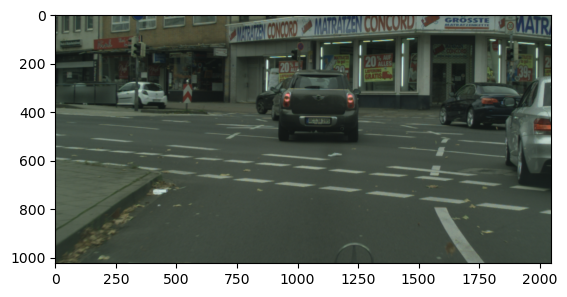

In [15]:
# Removing columns or rows of pixels from the image's side, as a fraction of the image size.
# The fraction is sampled, by random, from the continuous interval [0.10, 0.30].
crop = iaa.Crop(percent=(0.1, 0.3))
crop_img = crop.augment_image(test_image)
plt.imshow(crop_img)

### Contrast

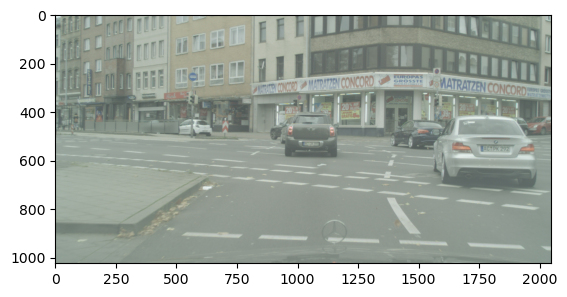

In [16]:
# Applying brightness to the image by adjusting image contrast by scaling pixel values.
# Modifying the contrast of images according to 255*((v/255)**gamma), v=pixel value.
bright = iaa.GammaContrast(gamma=0.4)
bright_img = bright.augment_image(test_image)
plt.imshow(bright_img)

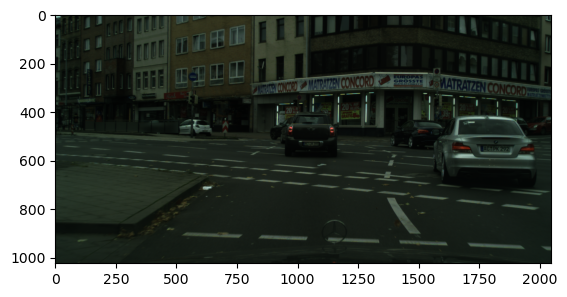

In [17]:
# Same than before but applying darkness to the image, with an higher gamma.
dark = iaa.GammaContrast(gamma=1.7)
dark_img = dark.augment_image(test_image)
plt.imshow(dark_img)

### Adding Noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


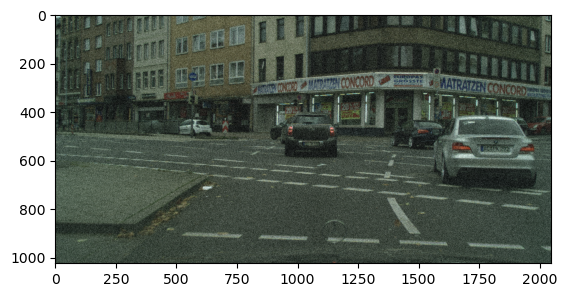

In [18]:
# Adding noise sampled from gaussian distributions elementwise to the image.
noise = iaa.AdditiveGaussianNoise(scale=(0.1, 0.2))
noise_img = noise.augment_image(test_image)
plt.imshow(noise_img)

<h4><div class="alert alert-block alert-warning" id="section_1A2">
2 - imgaug augmentation pipeline</div></h4>

Now that we saw some of the <b>imgaug</b> augmentation techniques, we are going to combine then together in a <b>pipeline</b> and execute them, applying certain transformations to images and other transformations to other ones.<br><br>
Needless to say that <b>for each image the specific transformations must apply to the respective mask</b>. 

In [19]:
# Helper function to display the images or the masks into a grid.
def gallery(array, ncols, mask=False):
    """Function to arrange images or masks into a grid."""
    if mask == False:
        nindex, height, width, intensity = array.shape
        nrows = nindex // ncols
        assert nindex == nrows * ncols
        image_grid = (array.reshape(nrows, ncols, height, width, intensity)
                      .swapaxes(1, 2)
                      .reshape(height * nrows, width * ncols, intensity))
        return image_grid
    elif mask == True:
        nindex, height, width = array.shape
        nrows = nindex // ncols
        assert nindex == nrows * ncols
        mask_grid = (array.reshape(nrows, ncols, height, width)
                      .swapaxes(1, 2)
                      .reshape(height * nrows, width * ncols))
        return mask_grid

In [20]:
def imgaug_pipeline(is_img=True, seed_num=10):
    """Defining the imgaug augmentation pipeline."""
    ia.seed(seed_num)  # to get the same transformations on the image and the mask.
    if is_img == True:
        # Augmentation list containing child augmenters to apply to inputs.
        aug_input = iaa.Sequential([
            iaa.Fliplr(0.5),  # horizontal flip 
            iaa.Crop(percent=(0, 0.3)),  # cropping 
            # Applying the 3 next child augmenters with a 30% probability for each.
            iaa.Sometimes(0.3, iaa.Affine(rotate=(-12, 12))),  # rotation     
            iaa.Sometimes(0.3, iaa.OneOf([
                iaa.GammaContrast(gamma=0.4),  # bright or...
                iaa.GammaContrast(gamma=1.5)   # dark
            ])),
            iaa.Sometimes(0.3, iaa.AdditiveGaussianNoise(scale=(0, 0.15)))  # noise
        ])
    # When it's a mask: same but without applying contrast and noise.
    elif is_img == False:
        aug_input = iaa.Sequential([
            iaa.Fliplr(0.5), 
            iaa.Crop(percent=(0, 0.3)), 
            iaa.Sometimes(0.5, iaa.Affine(rotate=(-12, 12)))
        ])
    return aug_input

In [21]:
# Applying the augmentation pipeline 9 times to an image.
images_aug_list = []
init = random.randint(0, 400)
for i in range(init, init + 9):
    image_aug = np.array(imgaug_pipeline(
        is_img=True, seed_num=i).augment_image(test_image))
    images_aug_list.append(image_aug)

# Visualizing the augmented images into a grid.
plt.figure(figsize=(30, 10))
plt.axis('off')
plt.imshow(gallery(np.array(images_aug_list), ncols=3))
plt.title('Examples of augmentation of the same image', size=23, pad=15)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Examples of augmentation of the same image')

Text(0.5, 1.0, 'Examples of augmentation of the respective masks of the same image')

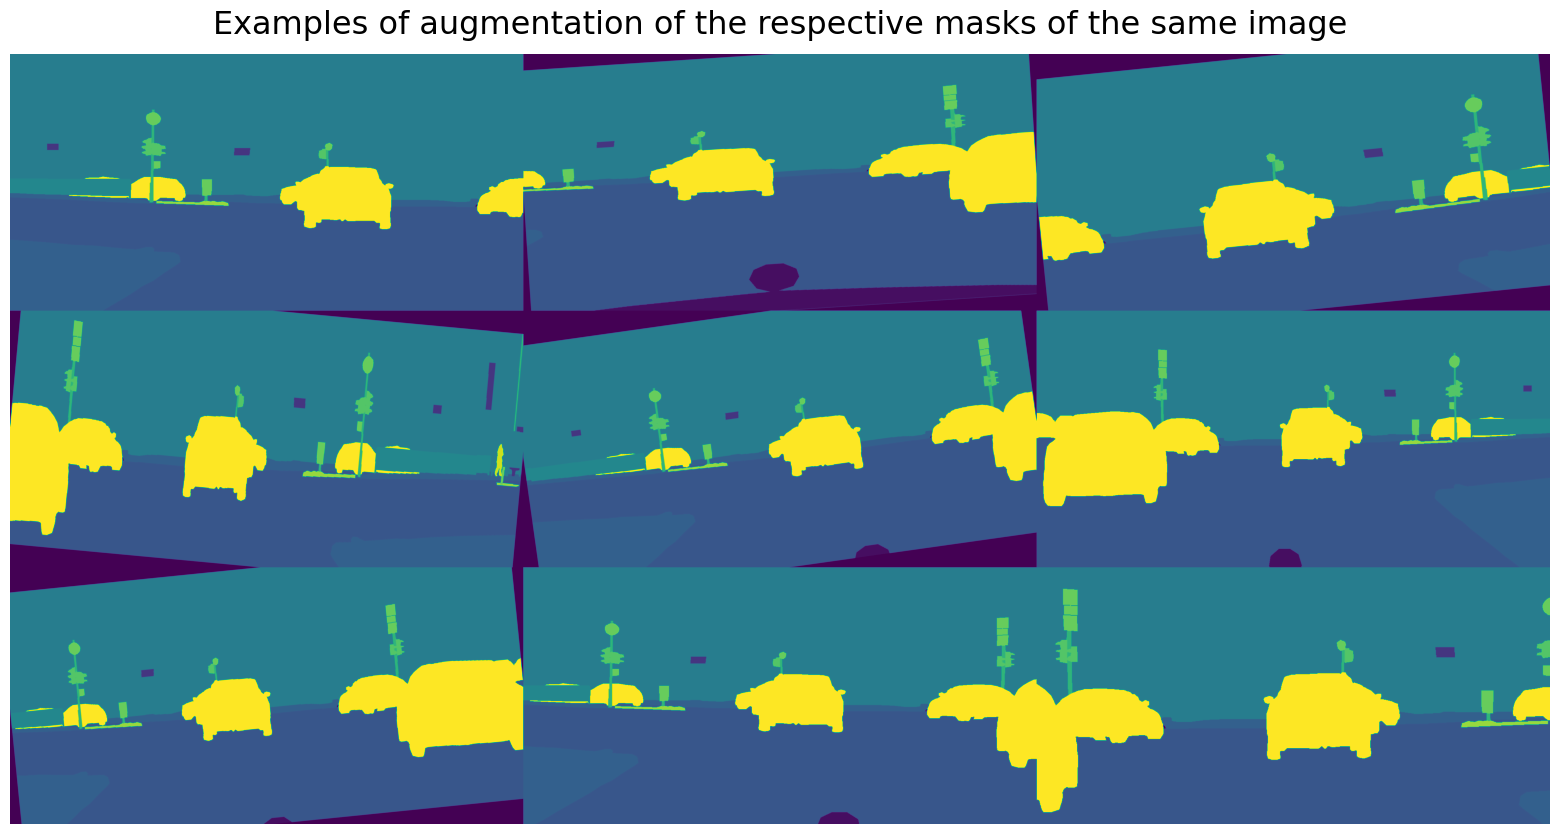

In [22]:
# Applying the augmentation pipeline 9 times to the mask of the same previous image.
mask_aug_list = []
for i in range(init, init + 9):
    mask_aug = np.array(imgaug_pipeline(
        is_img=False, seed_num=i).augment_image(test_mask))
    mask_aug_list.append(mask_aug)

# Visualizing the augmented masks into a grid.
plt.figure(figsize=(30, 10))
plt.axis('off')
plt.imshow(gallery(np.array(mask_aug_list), ncols=3, mask=True))
plt.title('Examples of augmentation of the respective masks of the same image', 
          size=23, pad=15)

## ajuster rotation et crop pour enlever le noir ? TODO ?

<h4><div class="alert alert-block alert-warning" id="section_1A3">
3 - Images and masks augmentation</div></h4>

In [23]:
def augmentation(img, mask):
    """Function to apply the augmentation pipeline 3 times to each image
    and respective mask, with changing seed for changing transformations.
    """
    # Image and mask augmentation.
    aug_img_list = []
    aug_mask_list = []
    init = random.randint(0, 400)
    for i in range(init, init + 3):
        # Image augmentation.
        image_aug = np.array(imgaug_pipeline(   
            is_img=True, seed_num=i).augment_image(img))
        aug_img_list.append(image_aug)
        # Mask augmentation.
        mask_aug = np.array(imgaug_pipeline(
            is_img=False, seed_num=i).augment_image(mask))
        aug_mask_list.append(mask_aug)
    return aug_img_list, aug_mask_list

In [24]:
# Creating the directories, if they don't exist, to put the augmentation inputs. 
path_img_train = 'datasets/images/train/_data_aug/'
path_msk_train = 'datasets/masks/train/_data_aug/'
path_img_val = 'datasets/images/val/_data_aug/'
path_msk_val = 'datasets/masks/val/_data_aug/'
paths = [path_img_train, path_msk_train, path_img_val, path_msk_val]
for path in paths:
    try: 
        os.mkdir(path)
    except OSError as error: 
        print(error)

[Errno 17] File exists: 'datasets/images/train/_data_aug/'
[Errno 17] File exists: 'datasets/masks/train/_data_aug/'
[Errno 17] File exists: 'datasets/images/val/_data_aug/'
[Errno 17] File exists: 'datasets/masks/val/_data_aug/'


In [25]:
# # Generating 3 augmented images and respective masks for each ones in the 'train' dataset.
# for i in range(len(image_train_paths)):
#     img = image.img_to_array(
#         image.load_img(image_train_paths[i])) / 255.0
#     mask = image.img_to_array(
#         image.load_img(mask_train_paths[i]))
#     mask = np.squeeze(mask)
#     aug_img_list, aug_mask_list = augmentation(img, mask)
#     # Saving the 3 augmented images in the 'datasets/images/train/_data_aug' directory.
#     imageio.imwrite(os.path.join(
#         path_img_train + "data_aug_%05d.png" % (2*i + i,)), aug_img_list[0])
#     imageio.imwrite(os.path.join(
#         path_img_train + "data_aug_%05d.png" % (2*i + i + 1,)), aug_img_list[1])
#     imageio.imwrite(os.path.join(
#         path_img_train + "data_aug_%05d.png" % (2*i + i + 2,)), aug_img_list[2])
#     # Saving the 3 augmented masks in the 'datasets/masks/train/_data_aug' directory.
#     cv2.imwrite(os.path.join(
#         path_msk_train + "data_aug_%05d.png" % (2*i + i,)), aug_mask_list[0])
#     cv2.imwrite(os.path.join(
#         path_msk_train + "data_aug_%05d.png" % (2*i + i + 1,)), aug_mask_list[1])
#     cv2.imwrite(os.path.join(
#         path_msk_train + "data_aug_%05d.png" % (2*i + i + 2,)), aug_mask_list[2])

In [26]:
num_img_train_files = next(os.walk('datasets/images/train/_data_aug/'))[2]
print(len(num_img_train_files))

num_msk_train_files = next(os.walk('datasets/masks/train/_data_aug/'))[2]
print(len(num_msk_train_files))

8925
8925


In [27]:
# # Generating 3 augmented images and respective masks for each ones in the 'val' dataset.
# for i in range(len(image_val_paths)):
#     img = image.img_to_array(
#         image.load_img(image_val_paths[i])) / 255.0
#     mask = image.img_to_array(
#         image.load_img(mask_val_paths[i]))
#     mask = np.squeeze(mask)
#     aug_img_list, aug_mask_list = augmentation(img, mask)
#     # Saving the 3 augmented images in the 'datasets/images/val/_data_aug' directory.
#     imageio.imwrite(os.path.join(
#         path_img_val + "data_aug_%05d.png" % (2*i + i,)), aug_img_list[0])
#     imageio.imwrite(os.path.join(
#         path_img_val + "data_aug_%05d.png" % (2*i + i + 1,)), aug_img_list[1])
#     imageio.imwrite(os.path.join(
#         path_img_val + "data_aug_%05d.png" % (2*i + i + 2,)), aug_img_list[2])
#     # Saving the 3 augmented masks in the 'datasets/masks/val/_data_aug' directory.
#     cv2.imwrite(os.path.join(
#         path_msk_val + "data_aug_%05d.png" % (2*i + i,)), aug_mask_list[0])
#     cv2.imwrite(os.path.join(
#         path_msk_val + "data_aug_%05d.png" % (2*i + i + 1,)), aug_mask_list[1])
#     cv2.imwrite(os.path.join(
#         path_msk_val + "data_aug_%05d.png" % (2*i + i + 2,)), aug_mask_list[2])

In [28]:
num_img_val_files = next(os.walk('datasets/images/val/_data_aug/'))[2]
print(len(num_img_val_files))

num_msk_val_files = next(os.walk('datasets/masks/val/_data_aug/'))[2]
print(len(num_msk_val_files))

1500
1500


In [29]:
# Number of images, and examples, in the training dataset after augmentation.
img_aug_train_paths = input_paths(_input='images', _type='train', is_aug=True)
print(f'\033[34;1mIn all directories, after augmentation, \
the number of train images is {len(img_aug_train_paths)}.')

# Number of masks, and examples, in the training dataset after augmentation.
msk_aug_train_paths = input_paths(_input='masks', _type='train', is_aug=True)
print(f'In all directories, after augmentation, \
the number of train masks is {len(msk_aug_train_paths)}.')

# Number of images, and examples, in the validation dataset.
img_aug_val_paths = input_paths(_input='images', _type='val', is_aug=True)
print(f'In all directories, after augmentation, \
the number of validation images is {len(img_aug_val_paths)}.')

# Number of masks, and examples, in the validation dataset.
msk_aug_val_paths = input_paths(_input='masks', _type='val', is_aug=True)
print(f'In all directories, after augmentation, \
the number of validation masks is {len(msk_aug_val_paths)}.\033[34;0m')

In all directories, after augmentation, the number of train images is 11900.
In all directories, after augmentation, the number of train masks is 11900.
In all directories, after augmentation, the number of validation images is 2000.
In all directories, after augmentation, the number of validation masks is 2000.


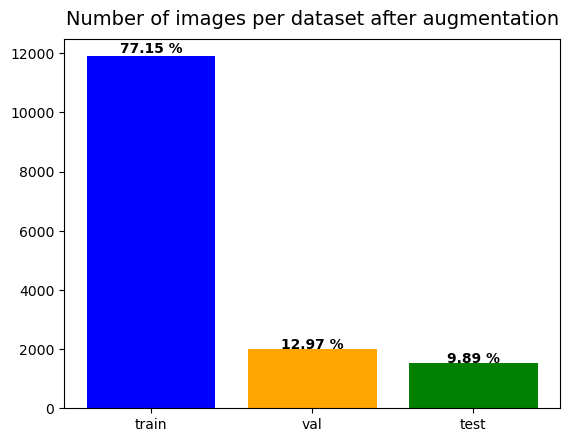

In [30]:
# Bar plot of the number of images per type of dataset after augmentation.
fig, ax = plt.subplots()
images_cat = ['train', 'val', 'test']
images_num = [len(img_aug_train_paths), 
              len(img_aug_val_paths), 
              len(image_test_paths)]
colors_list = ['blue', 'orange', 'green']
images = plt.bar(images_cat, images_num, color=colors_list)
for img in images:
    height = img.get_height()
    width = img.get_width()
    x, y = img.get_xy()
    ax.text(x + width / 2, y + height * 1.01,
            s=f"{height * 100 / sum(images_num):.2f} %", 
            ha='center', weight='bold')
plt.title('Number of images per dataset after augmentation', 
          size=14, pad=10)
plt.show()

###################################################

In [31]:
# mmm = "original/train/images/original_00597.png"
# mmmm = "original/train/masks/original_00597.png"
# test_image = image.img_to_array(
#     image.load_img(mmm)) / 255.
# test_mask = image.img_to_array(
#     image.load_img(mmmm, grayscale=True))
# test_mask = np.squeeze(test_mask)
# crop = iaa.Crop(percent=(0.2, 0.3))
# crop_img = crop.augment_image(test_image)
# plt.imshow(crop_img)
# print(crop_img)

In [32]:
# crop_msk = crop.augment_image(test_mask)
# plt.imshow(crop_msk)
# print(crop_msk)

MIN :  0.003921569
MAX :  0.91764706
[[[0.49411765 0.57254905 0.5019608 ]
  [0.49411768 0.5725796  0.50193024]
  [0.49411765 0.5803922  0.49411765]
  ...
  [0.44313726 0.48235294 0.44705883]
  [0.43923098 0.47844666 0.44315255]
  [0.4392157  0.47843137 0.44313726]]

 [[0.49411765 0.57254905 0.5019608 ]
  [0.49411768 0.5725796  0.50193024]
  [0.49411765 0.5803922  0.49411765]
  ...
  [0.44313726 0.48235294 0.44705883]
  [0.43923098 0.47844666 0.44315255]
  [0.4392157  0.47843137 0.44313726]]

 [[0.49943537 0.57254905 0.5125962 ]
  [0.499425   0.57256925 0.5125449 ]
  [0.4967765  0.57773334 0.49943537]
  ...
  [0.44313726 0.48767063 0.44705883]
  [0.43923098 0.48376435 0.44315255]
  [0.4392157  0.48374903 0.44313726]]

 ...

 [[0.42884707 0.47716865 0.40392154]
  [0.42881653 0.47713315 0.40387574]
  [0.42100394 0.46806276 0.39215687]
  ...
  [0.2627451  0.30322352 0.2731137 ]
  [0.2666514  0.30322352 0.2718559 ]
  [0.26666668 0.30322352 0.27185097]]

 [[0.42352942 0.4745098  0.40392157]


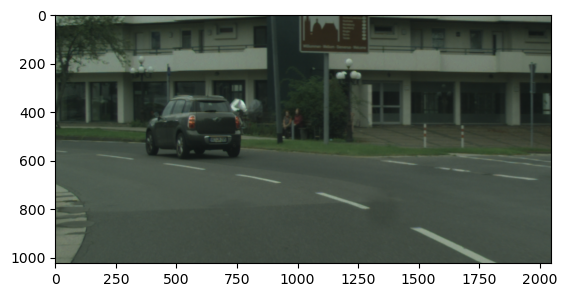

In [33]:
# ORIGINAL DE DATASETS
ia.seed(50)
orig_img_ds = "datasets/images/train/aachen/aachen_000000_000019_leftImg8bit.png"
orig_msk_ds = "datasets/masks/train/aachen/aachen_000000_000019_gtFine_labelIds.png"
test_img = image.img_to_array(
    image.load_img(orig_img_ds)) / 255.0
test_mask = image.img_to_array(
    image.load_img(orig_msk_ds, grayscale=True))
test_mask = np.squeeze(test_mask)
crop = iaa.Crop(percent=(0.2, 0.3))
crop_img = crop.augment_image(test_img)
plt.imshow(crop_img)
print("MIN : ", np.min(crop_img))
print("MAX : ", np.max(crop_img))
print(crop_img)

MIN :  4.0
MAX :  33.0
[[11. 11. 11. ... 21. 21. 21.]
 [11. 11. 11. ... 21. 21. 21.]
 [11. 11. 11. ... 21. 21. 21.]
 ...
 [ 7.  7.  7. ...  7.  7.  7.]
 [ 7.  7.  7. ...  7.  7.  7.]
 [ 7.  7.  7. ...  7.  7.  7.]]


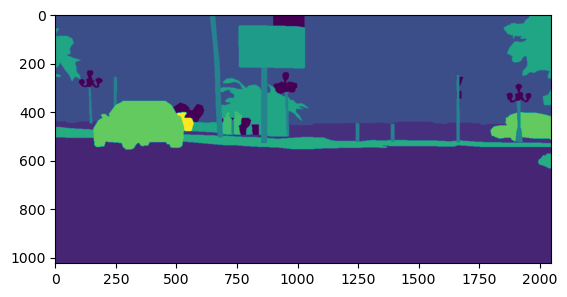

In [34]:
crop_msk = crop.augment_image(test_mask)
plt.imshow(crop_msk)
print("MIN : ", np.min(crop_msk))
print("MAX : ", np.max(crop_msk))
print(crop_msk)

MIN :  0.015686274
MAX :  0.5294118
[[[0.04313726 0.04705882 0.03921569]
  [0.04316784 0.04711998 0.03924627]
  [0.05098039 0.0627451  0.04705882]
  ...
  [0.12941177 0.16470589 0.13725491]
  [0.13331805 0.17251845 0.14116119]
  [0.13333334 0.17254902 0.14117648]]

 [[0.04313726 0.04705882 0.03921569]
  [0.04316784 0.04711998 0.03924627]
  [0.05098039 0.0627451  0.04705882]
  ...
  [0.12941177 0.16470589 0.13725491]
  [0.13331805 0.17251845 0.14116119]
  [0.13333334 0.17254902 0.14117648]]

 [[0.04047842 0.04439998 0.03655685]
  [0.040509   0.04446114 0.03659779]
  [0.04832155 0.06008626 0.04705882]
  ...
  [0.12675293 0.16736473 0.13991375]
  [0.13595617 0.17782576 0.1464685 ]
  [0.13599218 0.17786671 0.14649415]]

 ...

 [[0.13333334 0.16596861 0.13991375]
  [0.13332297 0.16597898 0.13991375]
  [0.1306745  0.16862746 0.13991375]
  ...
  [0.13333334 0.1595216  0.13207062]
  [0.13207553 0.1595216  0.13207062]
  [0.13207062 0.1595216  0.13207062]]

 [[0.13333334 0.16862746 0.13725491]
 

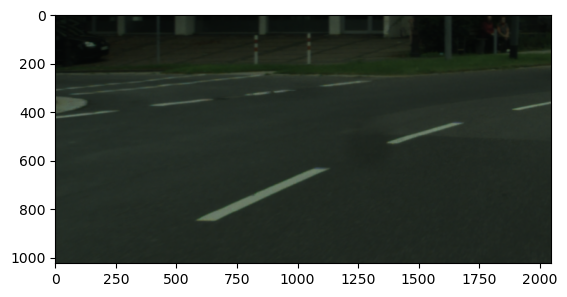

In [35]:
# AUGMENTATION DE DATASETS
ia.seed(50)
aug_img_ds = "datasets/images/train/_data_aug/data_aug_00001.png"
aug_msk_ds = "datasets/masks/train/_data_aug/data_aug_00001.png"
test_img_a = image.img_to_array(
    image.load_img(aug_img_ds)) / 255.0
test_mask_a = image.img_to_array(
    image.load_img(aug_msk_ds, grayscale=True))
test_mask_a = np.squeeze(test_mask_a)
crop = iaa.Crop(percent=(0.2, 0.3))
crop_img = crop.augment_image(test_img_a)
plt.imshow(crop_img)
print("MIN : ", np.min(crop_img))
print("MAX : ", np.max(crop_img))
print(crop_img)

In [36]:
crop_msk = crop.augment_image(test_mask_a)
plt.imshow(crop_msk)
print("MIN : ", np.min(crop_msk))
print("MAX : ", np.max(crop_msk))
print(crop_msk)

MIN :  4.0
MAX :  33.0
[[11. 11. 11. ... 26. 26. 26.]
 [11. 11. 11. ... 26. 26. 26.]
 [11. 11. 11. ... 26. 26. 26.]
 ...
 [ 7.  7.  7. ...  7.  7.  7.]
 [ 7.  7.  7. ...  7.  7.  7.]
 [ 7.  7.  7. ...  7.  7.  7.]]


In [37]:
dsdsd

NameError: name 'dsdsd' is not defined

<h3><div class="alert alert-block alert-info" id="section_1B">
B - DATA GENERATOR</div></h3>

The <b>manipulation of a large dataset</b> will be easier with the construction of a data generator as a python class. This generator creates data in batches to feed it to our network for training.<br>
For that, we will use the <b>*Sequence* class in Keras</b>, that handles all the multi-threading and parallelization behind the scene by fetching the batches ahead of time using multiple CPU cores.

To generate the dataset on multiple cores in real time and feed it right away to our deep learning models.

In [ ]:
cat_dict = {'void': [0, 1, 2, 3, 4, 5, 6], 
            'flat': [7, 8, 9, 10],
            'construction': [11, 12, 13, 14, 15, 16],
            'object': [17, 18, 19, 20],
            'nature': [21, 22],
            'sky': [23],
            'human': [24, 25],
            'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1]  # -1 is for the license plate.
           }

In [ ]:
# # This color map has been used to display the results in the mask.
# color_map = {
#     '0': [0, 0, 0],        # void (black)
#     '1': [160, 120, 50],   # flat (brown)
#     '2': [255, 200, 200],  # construction (pink)
#     '3': [255, 255, 120],  # object (yellow)
#     '4': [0, 150, 40],     # nature (green)
#     '5': [0, 160, 230],    # sky (blue)
#     '6': [255, 80, 80],    # human (red)
#     '7': [90, 0, 255]      # vehicule (purple)
# }

In [ ]:
# np.random.seed = 52
IMG_HEIGHT = 1024
IMG_WIDTH = 2048
IMG_CHANNELS = 3
n_classes = 8

In [ ]:
# #         self.shuffle = shuffle
# #         self.on_epoch_end()

# #         random.Random(1970).shuffle(self.x_set)  # shuffle the file paths...
# #         random.Random(1970).shuffle(self.y_set)  # with the same seed to keep the same order.

#     def on_epoch_end(self):
#         """Updates indexes after each epoch."""
#         self.indexes = np.arange(len(self.x_set))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

In [ ]:
class ImgSeqGenerator(Sequence):
    """Helper to iterate over the data (as Numpy arrays), 
    to load & vectorize batches of data.
    """

    def __init__(self, x_set, y_set, batch_size):
        """Generator constructor: parameters."""
        self.x_set = x_set
        self.y_set = y_set
        self.batch_size = batch_size

    def __len__(self):
        """Number of batches that this generator is supposed to produce, per epoch."""
        return len(self.x_set) // self.batch_size

    def __getitem__(self, idx):  # allows the instance to use the [] (indexer) operator.
        """Returns tuple (image, mask) corresponding to batch number.
        Generating one batch of data."""
        # Batch size list of random integers in the range of the size of the image list length.
        idx = np.random.randint(0, len(self.x_set), batch_size)  # seed à mettre ???
        batch_x, batch_y = [], []
        # Generating batch_x and batch_y.
        for i in idx:
            # Storing image.
            _image = image.img_to_array(
                image.load_img(f'{self.x_set[i]}', target_size=(
                    IMG_HEIGHT, IMG_WIDTH))) / 255.  
            # Storing mask.
            msk = image.img_to_array(
                image.load_img(f'{self.y_set[i]}', grayscale=True, target_size=(
                    IMG_HEIGHT, IMG_WIDTH)))
            msk = np.squeeze(msk)
            mask = np.zeros((msk.shape[0], msk.shape[1], n_classes))  # , dtype="uint8" effet memoire pas logique???
            for j in range(-1, 34):
                if j in cat_dict['void']:
                    mask[:, :, 0] = np.logical_or(mask[:, :, 0], (msk == j))
                elif j in cat_dict['flat']:
                    mask[:, :, 1] = np.logical_or(mask[:, :, 1], (msk == j))
                elif j in cat_dict['construction']:
                    mask[:, :, 2] = np.logical_or(mask[:, :, 2], (msk == j))
                elif j in cat_dict['object']:
                    mask[:, :, 3] = np.logical_or(mask[:, :, 3], (msk == j))
                elif j in cat_dict['nature']:
                    mask[:, :, 4] = np.logical_or(mask[:, :, 4], (msk == j))
                elif j in cat_dict['sky']:
                    mask[:, :, 5] = np.logical_or(mask[:, :, 5], (msk == j))
                elif j in cat_dict['human']:
                    mask[:, :, 6] = np.logical_or(mask[:, :, 6], (msk == j))
                elif j in cat_dict['vehicle']:
                    mask[:, :, 7] = np.logical_or(mask[:, :, 7], (msk == j))
            mask = np.resize(mask, (IMG_HEIGHT * IMG_WIDTH, n_classes))  # au cas ou images taille differente
            batch_y.append(mask)
            batch_x.append(_image)
        return np.array(batch_x), np.array(batch_y)

In [ ]:
# Create instances of the ImgSeqGenerator class.
batch_size = 85  # for training
batch_size_val = batch_size - 35  # 50 for validation
IMG_HEIGHT = 1024
IMG_WIDTH = 2048

train_generator = ImgSeqGenerator(image_train_paths, mask_train_paths, batch_size)
val_generator = ImgSeqGenerator(image_val_paths, mask_val_paths, batch_size_val)

In [ ]:
print(f"Number of batches of {batch_size} training images: \
{len(train_generator)}")
print(f"Number of batches of {batch_size_val} validation images: \
{len(val_generator)}")

In [ ]:
# ???pas nº batch ???, img 0, image nº des 85, height, width, nº channels 
train_generator[85][0][84][1023][2047]
# print(np.max(train_generator[0][1][10]))

In [ ]:
# ???pas nº batch ???, msk 1, image nº des 85, height*width, nº channels 
train_generator[0][1][84][2097151]  # vecteur applati (squeeze) du dernier pixel
# train_generator[0][1][84][1023][2047]

In [ ]:
# Generators for training and validation data after augmentation.
train_aug_generator = ImgSeqGenerator(
    img_aug_train_paths, msk_aug_train_paths, batch_size)
val_aug_generator = ImgSeqGenerator(
    img_aug_val_paths, msk_aug_val_paths, batch_size_val)

In [ ]:
print(f"Number of batches of {batch_size} training images: \
{len(train_aug_generator)}")
print(f"Number of batches of {batch_size_val} validation images: \
{len(val_aug_generator)}")

<h3><div class="alert alert-block alert-info" id="section_1C">
C - FINAL DATASETS FOR MODELLING</div></h3>

The validation set is interleaved with the training phases, and it is used to check how well the model is performing on data that has never seen before. The metrics acquired for validation data can be used, e.g., when the models starts to overfit, or to earlier stop the learning process if there is no further progress.

The testing dataset is used to take a final measure of how well the model performs, at the same time as measuring how various models compare to each other. It shouldn’t change between tests, nor should it contain any data from training or validation sets.

In [ ]:
# # Copying the training images and masks from source to destination.
# path_original_img_train = "original/train/images/"
# path_original_msk_train = "original/train/masks/"

# for i in range(len(image_train_paths)):
#     # Sanity check (image coresponding with the mask).
#     assert image_train_paths[i][21:-16] == mask_train_paths[i][20:-20]
#     # Source (path) of the image and the respective mask.
#     source_img = image_train_paths[i]
#     source_msk = mask_train_paths[i]
#     # New destination inside the original directory and subdirectories.
#     dest_img = path_original_img_train + "original_%05d.png" % (i)
#     dest_msk = path_original_msk_train + "original_%05d.png" % (i)
#     # Copying the training images and masks.
#     copyfile(source_img, dest_img)
#     copyfile(source_msk, dest_msk)

In [ ]:
# # Copying the validation images and masks from source to destination.
# path_original_img_val = "original/val/images/"
# path_original_msk_val = "original/val/masks/"

# for i in range(len(image_val_paths)):
#     # Sanity check (image coresponding with the mask).
#     assert image_val_paths[i][21:-16] == mask_val_paths[i][20:-20]
#     # Source (path) of the image and the respective mask.
#     source_img = image_val_paths[i]
#     source_msk = mask_val_paths[i]
#     # New destination inside the original directory and subdirectories.
#     dest_img = path_original_img_val + "original_%05d.png" % (i)
#     dest_msk = path_original_msk_val + "original_%05d.png" % (i)
#     # Copying the training images and masks.
#     copyfile(source_img, dest_img)
#     copyfile(source_msk, dest_msk)

In [ ]:
IMG_CHANNELS = 3
num_filters = 32
n_classes = 8

<h2><div class="alert alert-block alert-success" id="section_2">
PART 2 - CONVOLUTIONAL NEURAL NETWORKS MODELS</div></h2>

<h4><div class="alert alert-block alert-warning" id="section_21">
1 - Presentation</div></h4>

To deal with this semantic segmentation challenge, we are going to use Convolutional Neural Networks models, and more specifically U-NET models, which are Encoder-Decoder models. 

The U-Net is a convolutional network architecture, designed by Olaf Ronneberger, Philipp Fischer and Thomas Brox, for biomedical image segmentation, at the Computer Science Department of the University of Freiburg. U-NET is based upon the "fully convolutional" architecture, and "consists of a contracting path to capture context and a symmetric expanding path that enables precise localization." Why a FCN ? Because for problems where object location matters, densely connected features are largely useless. These Dense or Flatten layers get rid of the notion of space.

More precisely, a U-Net consists of an encoder which downsamples an image to an encoding (the lefthand side of architecture), and a mirrored decoder which upsamples the encoding back to the desired mask (the righthand side of the architecture). The contracting path is a typical convolutional network that consists of repeated application of convolutions, each followed by a rectified linear unit (ReLU) and a max pooling operation. During the contraction, the spatial information is reduced while feature information is increased. The decoder blocks have a number of skip connections (depicted by the horizontal arrows in the center) that directly connect from the encoder blocks. These skip connections copy features at a specific resolution and concatenate them channel-wise with specific feature maps in the decoder. This brings information at various levels of semantic granularity from the encoder directly into the decoder. After concatenating the feature maps from the contracting path onto the expanding path, a subsequent convolutional layer allows the network to learn to assemble and localize these features precisely. The final result is a network that is highly adept both at identifying features and at locating those features within two-dimensional space.

Moreover, the original U-Net uses all convolutions without padding, which means that border pixels are lost at each layer.

The original U-Net proposed by the authors used Transpose Convolutions for upsampling the feature maps.

In short, in the downslope of the U-NET (contracting path), the network learns to classify the objects with the features found.<br>
In the upslope (expansive path) the network try to localize the objects in the picture.

Pooling layers helps the architecture create feature hierarchies, but also causes loss of localized information. Skip connections preserve and forward this information to deeper layers by way of bypassing the pooling layers.

<h4><div class="alert alert-block alert-warning" id="section_22">
2 - Utils functions to build the U-NET models</div></h4>

In [ ]:
def encoder_block(input_tensor, num_filters, 
                  kernel_init='he_normal', pooling=True):  # autre kernel_init ?
    """Encoder block: 1 convolutional layer, 1 batch normalization, 1 convolutional layer,
    1 batch normalization and 1 max pooling layer (or not if it's the last encoder layer).
    """
    conv = Conv2D(filters=num_filters, kernel_size=(3, 3), strides=(1, 1),  # activity_regularizer=?
                  padding='same', use_bias=False, kernel_initializer=kernel_init)(input_tensor)
    # BatchNormalization is good for standardizing, stabilizing, speeding up the training
    # and reducing generalization error. No need of dropout anymore. No need of bias vector.
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    conv = Conv2D(num_filters, (3, 3),  padding='same', use_bias=False, 
                  kernel_initializer=kernel_init)(conv)
    conv = BatchNormalization()(conv)
    conv = Activation('relu')(conv)
    if pooling == True:
        pool = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv)
        return pool, conv
    return conv

def decoder_block(input_tensor, num_filters, concat_tensor, 
                  dropout=0.1, kernel_init='he_normal'):
    """Decoder block: 1 transposed convolution layer (with concatenation for skip connections), 
    1 convolutional layer, 1 dropout and 1 convolutional layer.
    """
    decoder = Conv2DTranspose(filters=num_filters, kernel_size=(2, 2), 
                              strides=(2, 2), padding='same')(input_tensor)  # strides are here stretching size.
    decoder = concatenate([decoder, concat_tensor])  # axis=3 ?
    decoder = Conv2D(filters=num_filters, kernel_size=(3, 3), 
                     strides=(1, 1), padding='same', 
                     activation='relu', kernel_initializer=kernel_init)(decoder)
    decoder = Dropout(rate=dropout, seed=52)(decoder)
    decoder = Conv2D(num_filters, (3, 3), activation='relu', 
                     kernel_initializer=kernel_init, 
                     padding='same')(decoder)
    return decoder

### Tester avec SeparableConv2D à la place de Conv2D après seulement le 1er Conv2D (à cause de du RGB)

In [ ]:
def training_model(model,
                   name, 
                   train_gen=train_generator, 
                   val_gen=val_generator, 
                   optimizer='adam', 
                   loss='sparse_categorical_crossentropy', 
                   metrics=[MeanIoU(num_classes=8, ignore_class=0)]):  # excluding void class
    """Configuring the model for training. Compiling, callbacks and fitting.
    """
    # Configuring the model for training.
    model.compile(optimizer=optimizer, loss=loss, # 'sparse' because data are integers.
                  metrics=metrics)
    
    # Defining EarlyStopping callback.
    earlystop = EarlyStopping(monitor='val_loss', patience=2, # revoir monitor
                              restore_best_weights=True)
    # Defining ModelCheckpoint callback. Model weights are saved at the end of every epoch, 
    # if it's the best seen so far.
    checkpoint_path = f"checkpoint/{name}"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                 monitor='val_loss',
                                 save_best_only=True)
    
    # Training the model, doing validation at the end of each epoch.
    # We use here fit() with a generator to deal with huge dataset that 
    # couldn't fit into memory.
    hist_model = model.fit(x=train_gen, 
                           epochs=50, 
                           verbose=2, 
                           callbacks=[earlystop, checkpoint], 
                           validation_data=val_gen, 
                           steps_per_epoch=(len(train_gen) // batch_size), 
                           validation_steps=(len(val_gen) // batch_size_val), 
                           workers=10, 
                           use_multiprocessing=True)

    # Saving the entire model as a SaveModel.
    model.save(f"{name}")
    
    return hist_model

<h4><div class="alert alert-block alert-warning" id="section_23">
3 - Utils functions to visualize the training process</div></h4>

In [ ]:
def iou_visu(hist):
    """Visualization of the Training and Validation Mean IoU."""
    iou = hist.history['MeanIoU']
    val = hist.history['val_MeanIoU']
    epochs = range(1, len(iou) + 1)

    plt.plot(epochs, accuracy, '-', label='Training mean IoU')
    plt.plot(epochs, val, ':', label='Validation mean IoU')
    plt.title('Training and Validation mean IoU')
    plt.xlabel('Epoch')
    plt.ylabel('Mean IoU')
    plt.legend()
    plt.show()

In [ ]:
def loss_visu(hist):
    """Visualization of the Training and Validation Loss."""
    loss = hist.history['sparse_categorical_crossentropy']
    val_loss = hist.history['val_sparse_categorical_crossentropy']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, '-', label='Training loss')
    plt.plot(epochs, val_loss, ':', label='Validation loss')
    plt.title('Training and Validation Loss (sparse_categorical_crossentropy)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

<h3><div class="alert alert-block alert-info" id="section_2A">
A - U-NET MINI (unet_mini) - BASE MODEL</div></h3>

If we add values from 0 to 255, it is not going to learn.

<h4><div class="alert alert-block alert-warning" id="section_2A1">
1 - Training the model</div></h4>

In [ ]:
# Loading the U-NET Mini model from the keras_segmentation package.
model_mini = unet_mini(n_classes=8, 
                       input_height=IMG_HEIGHT, 
                       input_width=IMG_WIDTH)

# Training the model with the generator data.
hist_model_mini = training_model(model=model_mini, 
                                 name="model_mini", 
                                 train_gen=train_generator, 
                                 val_gen=val_generator)

In [ ]:
# Visualization of the Training and Validation Mean IoU.
iou_visu(hist_model_mini)

In [ ]:
# Visualization of the Training and Validation Loss.
loss_visu(hist_model_mini)

<h4><div class="alert alert-block alert-warning" id="section_2A2">
2 - Making mask predictions</div></h4>

In [ ]:
out = hist_model_mini.predict_segmentation(
    inp="datasets/images/test/berlin/berlin_0000007_000019_leftImg8bit.png",
    out_fname="out_unet_mini.png"
)
plt.imshow(out)

In [ ]:
# # Evaluating the model with validation data.
# print(model_mini.evaluate_segmentation(
#     imp_images_dir="original/val/images/", 
#     annotations_dir="original/val/masks/"))

In [ ]:
ererreererreerererrererere

<h3><div class="alert alert-block alert-info" id="section_2B">
B - U-NET (unet)</div></h3>

U-Net is especially good with segmentation tasks because it can localize well to provide high resolution segmentation masks. In addition, it works well with small datasets and is relatively robust against overfitting as the training data is in terms of the number of patches within an image, which is much larger than the number of training images itself. Unlike the original model, we will add batch normalization to each of our blocks.

For upsampling, U-NET models use transposed convolutional layers. This is equivalent to first stretching the image by inserting empty rows and columns (full of zeros), then performing a regular convolution. These are also trainable layers.

I will try to preserve most of the essential parameters and architectural elements of the original implementation of the U-Net architecture. However, there will be slight changes from the original content that will improve the modern efficiency and improve the speed as well the simplicity of the model.

One of the changes that will be included in this structure is using the value of Convolution as "same".<br>
Also, since the concept of batch normalization was introduced in 2016, the original architecture did not use this aspect. But, our model implementation will include batch normalization as it yields the best results in most cases.

Ensure that your image shapes are divisible by at least 16 or multiples of 16. Since we are using four max-pooling layers during the down-sampling procedure, we don't want to encounter the divisibility of any odd number shapes.

Transpose convolutions are by far the most popular approach as they allow for us to develop a learned upsampling.

<img src="img_notebook/U-NET2.png" width="500" height="500">

<h4><div class="alert alert-block alert-warning" id="section_2B1">
1 - Building the model</div></h4>

We'll build these helper functions that will allow us to ensemble our model block operations easily and simply.

BatchNormalization()<br>
Batch normalization solves a major problem called internal covariate shift. It helps by making the data flowing between intermediate layers of the neural network look, this means you can use a higher learning rate. It has a regularizing effect which means you can often remove dropout.
Batch Norm is a normalization technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier. the standard deviation of the neurons' output.

UpSampling2D is just a simple scaling up of the image by using nearest neighbour or bilinear upsampling, so nothing smart. Advantage is it's cheap.
Conv2DTranspose is a convolution operation whose kernel is learnt (just like normal conv2d operation) while training your model. Using Conv2DTranspose will also upsample its input but the key difference is the model should learn what is the best upsampling for the job.

Mostly we use the Keras Sequential API to buil models, but here, because we don't have a linearly running model (because of the skip connections), we need to use the Functionnal API.

For a multiclass, single-label classification like ours, the last-layer activation is softmax and loss function is categorical_crossentropy.

In [ ]:
# Building the U-NET model architecture.
K.clear_session()  # clearing the RAM.

# Inputs (images).
inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), name='image_input')
# x = Rescaling(1/255)(inputs)

# Encoder layers.
conv_pool1, conv1 = encoder_block(input_tensor=inputs, num_filters=num_filters)
conv_pool2, conv2 = encoder_block(input_tensor=conv_pool1, num_filters=num_filters*2)
conv_pool3, conv3 = encoder_block(input_tensor=conv_pool2, num_filters=num_filters*4)
conv_pool4, conv4 = encoder_block(input_tensor=conv_pool3, num_filters=num_filters*8)

# Center or intermediate layer, with no max pooling.
conv5 = encoder_block(
    input_tensor=conv_pool4, num_filters=num_filters*16, pooling=False)

# Decoder layers.
decoder1 = decoder_block(input_tensor=conv5, num_filters=num_filters*8, 
                         concat_tensor=conv4, dropout=0.2)
decoder2 = decoder_block(input_tensor=decoder1, num_filters=num_filters*4, 
                         concat_tensor=conv3, dropout=0.2)
decoder3 = decoder_block(input_tensor=decoder2, num_filters=num_filters*2, 
                         concat_tensor=conv2, dropout=0.1)
decoder4 = decoder_block(input_tensor=decoder3, num_filters=num_filters, 
                         concat_tensor=conv1, dropout=0.1) # axis=3 ???

# Adding a per-pixel classification layer and outputting the mask of the input image.
# The output classes are mutually exclusive, we can only choose one, then we use a softmax function.
# A pixel can't share a label. So sigmoid won't be use.
outputs = Conv2D(filters=n_classes, kernel_size=(1, 1), padding='same',
                 activation='softmax', name='mask_output')(decoder4)

# Defining the model.
unet_model = Model(inputs=inputs, outputs=outputs, name='UNET_model') 

# Summary of the model.
unet_model.summary()

In [ ]:
# Plotting the structure of the model and saving it as a PNG image.
plot_model(unet_model, to_file="UNetModel.png", 
           show_shapes=True, show_layer_activations=True)

In [ ]:
hist_model = training_model(model=unet_model, 
                            train_gen=train_generator, 
                            val_gen=val_generator)

<h4><div class="alert alert-block alert-warning" id="section_2B2">
2 - Training the model</div></h4>

Training your model with tf.data involves simply providing the model's fit function with your training/validation dataset, the number of steps, and epochs.

We also include a Model callback, ModelCheckpoint that will save the model to disk after each epoch. We configure it such that it only saves our highest performing model. Note that saving the model capture more than just the weights of the model: by default, it saves the model architecture, weights, as well as information about the training process such as the state of the optimizer, etc.

In [ ]:
# save_model_path = '/tmp/weights.hdf5'
# cp = tf.keras.callbacks.ModelCheckpoint(
#     filepath=save_model_path, monitor='val_dice_loss', save_best_only=True, verbose=1)

Don't forget to specify our model callback in the fit function call.

In [ ]:
# Visualization of the Training and Validation Mean IoU.
iou_visu(hist_model)

In [ ]:
# Visualization of the Training and Validation Loss.
loss_visu(hist_model)

In [ ]:
test_model = keras.models.load_model(checkpoint_path)  # essayer sans load_model car earlystopping avec restore.
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

In [ ]:
# # Final evaluation of the model, calculating the accuracy on the testing dataset.
# _, acc = model_lstm1.evaluate(int_test_lstm, y_test_lstm)
# print(f"Testing accuracy: {acc:.3f}")

In [ ]:
dice = history.history['dice_loss']
val_dice = history.history['val_dice_loss']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, dice, label='Training Dice Loss')
plt.plot(epochs_range, val_dice, label='Validation Dice Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Dice Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
# Alternatively, load the weights directly: model.load_weights(save_model_path)
model = models.load_model(
    save_model_path, custom_objects={'bce_dice_loss': bce_dice_loss,
                                     'dice_loss': dice_loss})

In [ ]:
model_unet = unet(n_classes=8, 
                  input_height=IMG_HEIGHT, 
                  input_width=IMG_WIDTH)

model_unet.train(
    train_images="original/train/images/",
    train_annotations="original/train/masks_lb/",
    checkpoints_path="/tmp/unet", 
    epochs=5
)

out = model_unet.predict_segmentation(
    inp="datasets/images/test/berlin/berlin_000000_000019_leftImg8bit.png",
    out_fname="out_unet.png"
)
plt.imshow(out)

<h4><div class="alert alert-block alert-warning" id="section_2B3">
3 - Making mask predictions</div></h4>

In [ ]:
# # Evaluating the model.
# print(model_unet.evaluate_segmentation(
#     imp_images_dir="original/test/images/", 
#     annotations_dir="original/test/masks/"))

<h3><div class="alert alert-block alert-info" id="section_2C">
C - VGG-16 U-NET (vgg_unet)</div></h3>

VGG16 is a very well-documented and commonly used architecture for convolutional neural networks.
This network is a pretty large network and it has about 138 million (approx.) parameters.

The proposed U-Net model used the VGG16 model as the encoder.

<img src="img_notebook/VGG16.png" width="500" height="500">

<h4><div class="alert alert-block alert-warning" id="section_2C1">
1 - Training the model</div></h4>

In [ ]:
# Loading the VGG-16 U-NET model from the keras_segmentation package.
model_vgg = vgg_unet(n_classes=8, 
                     input_height=IMG_HEIGHT, 
                     input_width=IMG_WIDTH)

# Training the model with the generator data.
hist_model_vgg = training_model(model=model_vgg, 
                                name="model_vgg", 
                                train_gen=train_generator, 
                                val_gen=val_generator)

In [ ]:
# Visualization of the Training and Validation Mean IoU.
iou_visu(hist_model_vgg)

In [ ]:
# Visualization of the Training and Validation Loss.
loss_visu(hist_model_vgg)

<h4><div class="alert alert-block alert-warning" id="section_2C2">
2 - Making mask predictions</div></h4>

In [ ]:
out = hist_model_vgg.predict_segmentation(
    inp="datasets/images/test/berlin/berlin_0000007_000019_leftImg8bit.png",
    out_fname="out_unet_vgg.png"
)
plt.imshow(out)

In [ ]:
# # Evaluating the model.
# print(model_vgg.evaluate_segmentation(
#     imp_images_dir="original/test/images/", 
#     annotations_dir="original/test/masks/"))

<h3><div class="alert alert-block alert-info" id="section_2D">
D - VGG-16 FCN32 (fcn_32_vgg)</div></h3>

FCN [12] (2014): Fully convolutional encoder structure (i.e., no fully connected layers) with skip connections that fuse multiscale activations at the final decision layer.    

<h4><div class="alert alert-block alert-warning" id="section_2D1">
1 - Training the model</div></h4>

In [ ]:
# Loading the VGG-16 FCN32 model from the keras_segmentation package.
model_fcn = fcn_32_vgg(n_classes=8, 
                       input_height=IMG_HEIGHT, 
                       input_width=IMG_WIDTH)

# Training the model with the generator data.
hist_model_fcn = training_model(model=model_fcn, 
                                name="model_fcn", 
                                train_gen=train_generator, 
                                val_gen=val_generator)

In [ ]:
# Visualization of the Training and Validation Mean IoU.
iou_visu(hist_model_fcn)

In [ ]:
# Visualization of the Training and Validation Loss.
loss_visu(hist_model_fcn)

<h4><div class="alert alert-block alert-warning" id="section_2D2">
2 - Making mask predictions</div></h4>

In [ ]:
out = hist_model_fcn.predict_segmentation(
    inp="datasets/images/test/berlin/berlin_0000007_000019_leftImg8bit.png",
    out_fname="out_fcn.png"
)
plt.imshow(out)

In [ ]:
# # Evaluating the model.
# print(model_fcn.evaluate_segmentation(
#     imp_images_dir="original/test/images/", 
#     annotations_dir="original/test/masks/"))

<h3><div class="alert alert-block alert-info" id="section_2E">
E - VGG-16 Segnet (vgg_segnet)</div></h3>

Seg-Net [22] (2015): Encoder/decoder structure (similar to U-Net) with skip connections that transmit only pooling indices (unlike U-Net, for which skip connections concatenate same-level activations).

<h4><div class="alert alert-block alert-warning" id="section_2E1">
1 - Training the model</div></h4>

In [ ]:
# Loading the VGG-16 Segnet model from the keras_segmentation package.
model_segnet = vgg_segnet(n_classes=8, 
                          input_height=IMG_HEIGHT, 
                          input_width=IMG_WIDTH)

# Training the model with the generator data.
hist_model_segnet = training_model(model=model_segnet, 
                                   name="model_segnet", 
                                   train_gen=train_generator, 
                                   val_gen=val_generator)

In [ ]:
# Visualization of the Training and Validation Mean IoU.
iou_visu(hist_model_segnet)

In [ ]:
# Visualization of the Training and Validation Loss.
loss_visu(hist_model_segnet)

<h4><div class="alert alert-block alert-warning" id="section_2E2">
2 - Making mask predictions</div></h4>

In [ ]:
out = hist_model_segnet.predict_segmentation(
    inp="datasets/images/test/berlin/berlin_0000007_000019_leftImg8bit.png",
    out_fname="out_segnet.png"
)
plt.imshow(out)

In [ ]:
# # Evaluating the model.
# print(model_segnet.evaluate_segmentation(
#     imp_images_dir="original/test/images/", 
#     annotations_dir="original/test/masks/"))

<h3><div class="alert alert-block alert-info" id="section_2F">
F - Resnet50 U-NET (resnet50_unet)</div></h3>

Seg-Net [22] (2015): Encoder/decoder structure (similar to U-Net) with skip connections that transmit only pooling indices (unlike U-Net, for which skip connections concatenate same-level activations).

<h4><div class="alert alert-block alert-warning" id="section_2F1">
1 - Training the model</div></h4>

In [ ]:
# Loading the Resnet50 U-NET model from the keras_segmentation package.
model_resnet = resnet50_unet(n_classes=8, 
                             input_height=IMG_HEIGHT, 
                             input_width=IMG_WIDTH)

# Training the model with the generator data.
hist_model_resnet = training_model(model=model_resnet, 
                                   name="model_resnet", 
                                   train_gen=train_generator, 
                                   val_gen=val_generator)

In [ ]:
# Visualization of the Training and Validation Mean IoU.
iou_visu(hist_model_segnet)

In [ ]:
# Visualization of the Training and Validation Loss.
loss_visu(hist_model_segnet)

<h4><div class="alert alert-block alert-warning" id="section_2F2">
2 - Making mask predictions</div></h4>

In [ ]:
out = hist_model_resnet.predict_segmentation(
    inp="datasets/images/test/berlin/berlin_0000007_000019_leftImg8bit.png",
    out_fname="out_resnet.png"
)
plt.imshow(out)

In [ ]:
# # Evaluating the model.
# print(model_resnet.evaluate_segmentation(
#     imp_images_dir="original/test/images/", 
#     annotations_dir="original/test/masks/"))

<h3><div class="alert alert-block alert-info" id="section_2G">
G - PSPNet101 Cityscapes (pspnet_101_cityscapes)</div></h3>

We will use here a PSPNet pretrained model, precisely trained on the Cityscapes dataset.

<h4><div class="alert alert-block alert-warning" id="section_2G1">
1 - Training the model</div></h4>

In [ ]:
# Loading the PSPNet101 Cityscapes model from the keras_segmentation package.
# This is a pretrained model trained on Cityscapes dataset.
model_psp = pspnet_101_cityscapes()
out = model.predict_segmentation(
    inp="dataset1/images_prepped_train/0001TP_006690.png",
    out_fname="out_pspnet_101_cityscapes.png"
)
plt.imshow(out)

In [ ]:
model_psp = pspnet_101_cityscapes()
    inp="datasets/images/test/berlin/berlin_000000_000019_leftImg8bit.png",
    out_fname="out_pspnet_101_cityscapes.png"
)
plt.imshow(out)

### Fine-tuning the pretrained model

In [ ]:
transfer_weights()

<h4><div class="alert alert-block alert-warning" id="section_2G2">
2 - Making mask predictions</div></h4>

In [ ]:
# Evaluating the model.
print(model_psp.evaluate_segmentation(
    imp_images_dir="original/test/images/", 
    annotations_dir="original/test/masks/"))

<h2><div class="alert alert-block alert-success" id="section_3">
PART 3 - MODELS PERFORMANCE AND POSSIBLE IMPROVEMENT</div></h2>

<h3><div class="alert alert-block alert-info" id="section_3A">
A - MODELS PERFORMANCE EVALUATION</div></h3>

|Model|IoU coef|Dice coef|Time (sec)|IoU coef|Dice coef|Time (sec)|
|:--|:-:|:-:|:-:|:-:|:-:|:-:|
|<td colspan=3>**without augmentation**<td colspan=2>**with augmentation**|
|***unet_mini***|0.900|0.900|23.9|0.900|0.900|23.9|
|***unet***|0.900|<div style="background: green; color: white"> 0.900</div>|23.9|0.900|0.900|23.9|
|***vgg_unet***|0.900|0.900|23.9|<div style="background: red; color: black"> 0.900</div>|0.900|23.9|
|***<div style="background: blue; color: white">fcn_32_vgg</div>***|0.900|0.900|23.9|0.900|0.900|23.9|
|***vgg_segnet***|0.900|0.900|23.9|0.900|0.900|23.9|
|***resnet50_unet***|0.900|0.900|23.9|0.900|0.900|23.9|
|***pspnet_101_cityscapes***|0.900|0.900|23.9|0.900|0.900|23.9|

<h3><div class="alert alert-block alert-info" id="section_3B">
B - WAYS TO IMPROVE THE RESULT</div></h3>

<h4><div class="alert alert-block alert-warning" id="section_3B1">
1 - Hyperparameter tuning</div></h4>

During training, some parameters must be considered to be altered in order to get the best performance.
<br><br><b>Typical ConvNets parameters are the following</b>:<br><br>
• <b>Batch size</b>: the number of training images in one forward or backward pass.<br>
• <b>Iterations</b>: the number forward or backward of passes.<br>
• <b>Epoch</b>: measures how many times every image has been seen during training. It can be also understood as a one forward pass and one backward pass of all the training examples.<br>
• <b>Loss function</b>: evaluates the penalty between the prediction and the ground truth label in every batch.<br>
• <b>Learning rate</b>: defines the step size for which the weights of a model are updated regarding the stochastic gradient descent.<br>
• <b>Optimizer</b>: to find the most optimal set of hyperparameters for the model (SGD, RMSprop, Adam, etc.).

<h4><div class="alert alert-block alert-warning" id="section_3B2">
2 - Testing other algorithmes</div></h4>

<h2><div class="alert alert-block alert-success" id="section_00">
CONCLUSION</div></h2>

<img src="img_notebook/future_vision_transport.png" width="250" height="250">

In [ ]:
# def semantic_seg_metrics2(y_true, y_pred, metric_name, 
#                          metric_type='standard', drop_last=True, 
#                          mean_per_class=False):
#     """
#     Compute mean IoU or Dice metrics of two segmentation masks, via Keras.
#     Args:
#         y_true: true masks, one-hot encoded.
#         y_pred: predicted masks, either softmax outputs, or one-hot encoded.
#         metric_name: metric to be computed, either 'iou' or 'dice'.
#         metric_type: one of 'standard' (default), 'soft', 'naive'.
#           In the standard version, y_pred is one-hot encoded and the mean
#           is taken only over classes that are present (in y_true or y_pred).
#           The 'soft' version of the metrics are computed without one-hot
#           encoding y_pred.
#         drop_last = True: boolean flag to drop last class (usually reserved
#           for background class in semantic segmentation)
#         mean_per_class = False: return mean along batch axis for each class.
#     Returns:
#         IoU or Dice of y_true and y_pred, as a float, unless mean_per_class == True
#           in which case it returns the per-class metric, averaged over the batch.

#     Inputs are B*W*H*N tensors, with
#         B = batch size,
#         W = width,
#         H = height,
#         N = number of classes
#     """

#     flag_soft = (metric_type == 'soft')

#     # Always assume one or more classes
#     num_classes = K.shape(y_true)[-1]

#     if not flag_soft:
#         # get one-hot encoded masks from y_pred (true masks should already be one-hot)
#         y_pred = K.one_hot(K.argmax(y_pred), num_classes)
#         y_true = K.one_hot(K.argmax(y_true), num_classes)

#     # If already one-hot, could have skipped above command
#     # keras uses float32 instead of float64, would give error down 
#     # (but numpy arrays or keras.to_categorical gives float64).
#     y_true = K.cast(y_true, 'float32')
#     y_pred = K.cast(y_pred, 'float32')

#     # Intersection and union shapes are batch_size * n_classes (values = area in pixels)
#     axes = (1,2) # W,H axes of each image
#     intersection = K.sum(K.abs(y_true * y_pred), axis=axes)
#     mask_sum = K.sum(K.abs(y_true), axis=axes) + K.sum(K.abs(y_pred), axis=axes)
#     union = mask_sum  - intersection # or, np.logical_or(y_pred, y_true) for one-hot

#     smooth = .001
#     iou = (intersection + smooth) / (union + smooth)
#     dice = 2 * (intersection + smooth)/(mask_sum + smooth)

#     metric = {'iou': iou, 'dice': dice}[metric_name]

#     # Define mask to be 0 when no pixels are present in either y_true or y_pred, 1 otherwise
#     mask =  K.cast(K.not_equal(union, 0), 'float32')

#     if drop_last:
#         metric = metric[:,:-1]
#         mask = mask[:,:-1]

#     # Take mean only over non-absent classes.
#     class_count = K.sum(mask, axis=0)
#     non_zero = tf.greater(class_count, 0)
#     non_zero_sum = tf.boolean_mask(K.sum(metric * mask, axis=0), non_zero)
#     non_zero_count = tf.boolean_mask(class_count, non_zero)

#     return K.mean(non_zero_sum / non_zero_count)

# def mean_iou(y_true, y_pred, **kwargs):
#     """
#     Compute mean Intersection over Union of two segmentation masks, via Keras.
#     """
#     return semantic_seg_metrics(y_true, y_pred, metric_name='iou', **kwargs)

# def mean_dice(y_true, y_pred, **kwargs):
#     """
#     Compute mean Dice coefficient of two segmentation masks, via Keras.
#     """
#     return semantic_seg_metrics(y_true, y_pred, metric_name='dice', **kwargs)